In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D , BatchNormalization , Dropout

In [16]:
# generators divide data in batches to process large data
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', # cats->0 and dogs->1
    batch_size = 32,
    image_size = (256, 256)
)

val_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', # cats->0 and dogs->1
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# the images above is stored in form of numpy array. Numpy array have values from 0 to 255 we normalize it from 0 to 1
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [18]:
# CNN model
model = Sequential()

model.add(Conv2D(32 , kernel_size=(3,3) , padding='valid' , activation='relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(64 , kernel_size=(3,3) , padding='valid' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(128 , kernel_size=(3,3) , padding='valid' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1 , activation='sigmoid'))



In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [21]:
history = model.fit(train_data , epochs=10 , validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.3706 - accuracy: 0.6006 - val_loss: 0.6089 - val_accuracy: 0.6842
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6094 - accuracy: 0.6776 - val_loss: 0.5856 - val_accuracy: 0.6820
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5499 - accuracy: 0.7217 - val_loss: 0.5767 - val_accuracy: 0.6934
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4800 - accuracy: 0.7615 - val_loss: 0.5935 - val_accuracy: 0.7206
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4281 - accuracy: 0.7901 - val_loss: 0.4413 - val_accuracy: 0.7926
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3864 - accuracy: 0.8133 - val_loss: 0.5431 - val_accuracy: 0.7546
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3285 - accuracy: 0.8339 - val_loss: 0.5571 - val_ac

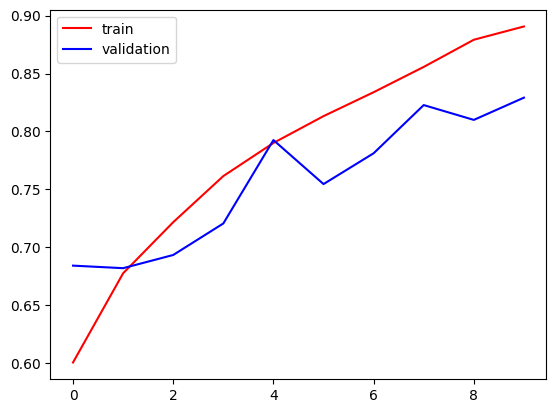

In [22]:
# we got 625 batches in 32 batch_size

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

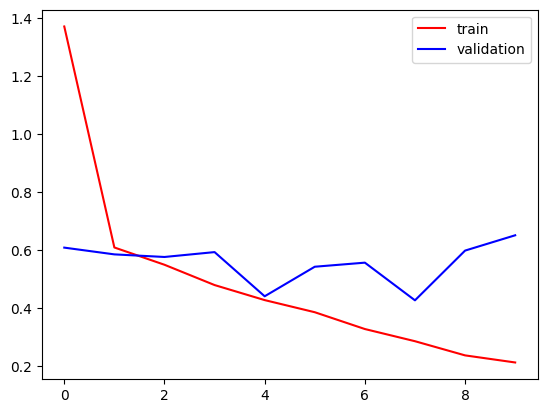

In [23]:
plt.plot(history.history['loss'] , color='red' , label='train')
plt.plot(history.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

In [24]:
# Now to test our model on real world data we download cats and dogs images from internet


**OutPut 1 is Dog and 0 is Cat**

In [27]:
import cv2 # import opencv

***Test 1 on real world data***

In [51]:
test_img1= cv2.imread('/content/dog1.jpg')

(360, 540, 3)

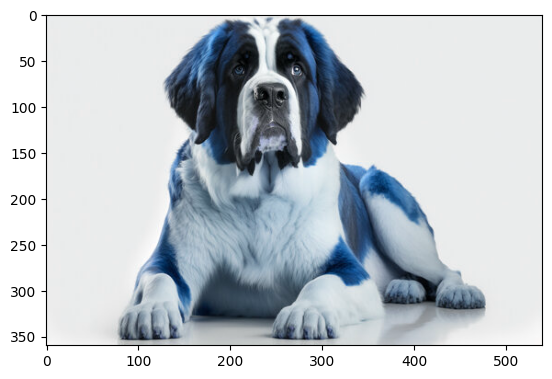

In [52]:
plt.imshow(test_img1)
test_img1.shape  # our model takes 256*256 image so we will resize it

In [53]:
test_img1 = cv2.resize(test_img1 , (256,256))
test_img1.shape

(256, 256, 3)

In [54]:
test_imput1=test_img1.reshape(1,256,256,3) # we convert our image to a 4D tensor
# as we pass our data in batches so we pass 1 image in the batch
# this shows (1 batch , and size of the image data is 256*256*3 for rgb channels)
test_imput1.shape

(1, 256, 256, 3)

In [55]:
model.predict(test_imput1)
# gives output =1

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)